In [1]:
# dem_tile = '/vsicurl/https://copernicus-dem-30m.s3.amazonaws.com/Copernicus_DSM_COG_10_N41_00_W088_00_DEM/Copernicus_DSM_COG_10_N41_00_W088_00_DEM.tif'
import os
import numpy as np
import rasterio
from pathlib import Path 
from shapely.geometry import GeometryCollection, box
from asf_tools.dem import prepare_dem_vrt

accumulation_threshold = 1000
dem_dir = Path("C:/DHI/HAND/DEM/FABDEM")
print(f"ACC: {accumulation_threshold}")

fileList = os.listdir(dem_dir)


# for filename in fileList:
filename = fileList[0][:-4]
print(filename)

dem_tile = dem_dir / f"{filename}.tif"
out_dir = Path(f"C:/DHI/HAND/outputs_ACC_{accumulation_threshold}") 
out_dir.mkdir(exist_ok=True, parents=True)

tmp_dir =  out_dir / "tmp"
tmp_dir.mkdir(exist_ok=True, parents=True)

with rasterio.open(dem_tile) as dem:
        dem_bounds = dem.bounds
        dem_meta = dem.meta

dem_geometry = box(*dem_bounds)
aoi_buffered = GeometryCollection([dem_geometry.buffer(0.5)])

# hydroBASIN
import geopandas as gpd
hydroBASIN = gpd.read_file("hydroBASIN/hybas_sa_lev05_v1c\hybas_sa_lev05_v1c.shp")
basins =  hydroBASIN[hydroBASIN.geometry.intersects(aoi_buffered)]


<>:36: SyntaxWarning: invalid escape sequence '\h'
<>:36: SyntaxWarning: invalid escape sequence '\h'
C:\Users\puzh\AppData\Local\Temp\ipykernel_7824\1599464012.py:36: SyntaxWarning: invalid escape sequence '\h'
  hydroBASIN = gpd.read_file("hydroBASIN/hybas_sa_lev05_v1c\hybas_sa_lev05_v1c.shp")


ACC: 1000
N08W074_FABDEM_V1-2


In [2]:
dem_bounds

BoundingBox(left=-74.00013888888888, bottom=8.000138888888891, right=-73.00013888888888, top=9.00013888888889)

In [3]:
hydroBASIN

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,6050000010,0,6050000010,6050000010,0.0,0.0,72363.7,72363.7,61100,0,1,0,1,"MULTIPOLYGON (((-75.73472 10.17083, -75.75746 ..."
1,6050000740,0,6050000740,6050000740,0.0,0.0,17944.3,260739.0,61201,0,0,1,2,"POLYGON ((-74.075 9.59167, -74.07254 9.59131, ..."
2,6050068100,6050000740,6050000740,6050000740,276.9,276.9,17105.5,17105.5,61202,0,0,2,3,"POLYGON ((-74.95833 8.1375, -74.95777 8.12279,..."
3,6050068110,6050000740,6050000740,6050000740,277.1,277.1,610.1,225687.7,61203,0,0,1,4,"POLYGON ((-74.64167 9.04583, -74.63953 9.04519..."
4,6050070260,6050068110,6050000740,6050000740,315.1,315.1,61901.9,61901.9,61204,0,0,2,5,"MULTIPOLYGON (((-74.75417 7.02083, -74.75295 7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,6050041130,0,6050041130,6050041130,0.0,0.0,3799.6,3799.6,65308,2,0,1,492,"POLYGON ((-65.37083 -40.6375, -65.37326 -40.63..."
492,6050041170,0,6050041170,6050041170,0.0,0.0,4094.7,4094.7,66401,2,0,1,493,"POLYGON ((-68.55833 -27.12083, -68.55777 -27.1..."
493,6050041200,0,6050041200,6050041200,0.0,0.0,12058.3,12058.3,65102,2,0,1,494,"POLYGON ((-65.16667 -37.2375, -65.16667 -37.23..."
494,6050041310,0,6050041310,6050041310,0.0,0.0,3491.6,3491.6,65304,2,0,1,495,"POLYGON ((-66.80833 -42.3125, -66.80923 -42.31..."


In [54]:
basin = hydroBASIN[hydroBASIN.HYBAS_ID==6050069460]

# FABDEM Tiles Geojson

tiles = gpd.read_file("data/FABDEM_v1-2_tiles.geojson")
basin_geo = GeometryCollection([basin.geometry])[0]
tiles_filtered =  tiles[tiles.geometry.intersects(basin_geo)]

print('zipfile_name', tiles_filtered.zipfile_name.unique())
tiles_filtered

zipfile_name ['N00W080-N10W070_FABDEM_V1-2.zip']


,tile_name,file_name,zipfile_name,geometry
13923,N008W075,N008W075_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-75 8, -75 9, -74 9, -74 8, -75 8))"
13924,N008W074,N008W074_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-74 8, -74 9, -73 9, -73 8, -74 8))"
14058,N007W075,N007W075_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-75 7, -75 8, -74 8, -74 7, -75 7))"
14059,N007W074,N007W074_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-74 7, -74 8, -73 8, -73 7, -74 7))"
14060,N007W073,N007W073_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-73 7, -73 8, -72 8, -72 7, -73 7))"
14176,N006W075,N006W075_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-75 6, -75 7, -74 7, -74 6, -75 6))"
14177,N006W074,N006W074_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-74 6, -74 7, -73 7, -73 6, -74 6))"
14178,N006W073,N006W073_FABDEM_V1-2.tif,N00W080-N10W070_FABDEM_V1-2.zip,"POLYGON ((-73 6, -73 7, -72 7, -72 6, -73 6))"


In [49]:
tiles_filtered.zipfile_name.unique()

array(['N00W080-N10W070_FABDEM_V1-2.zip'], dtype=object)

In [51]:
basin.geometry

492    POLYGON ((-68.55833 -27.12083, -68.55777 -27.1...
Name: geometry, dtype: geometry

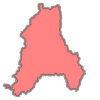

In [46]:
GeometryCollection([basin.geometry])[0]

<Axes: >

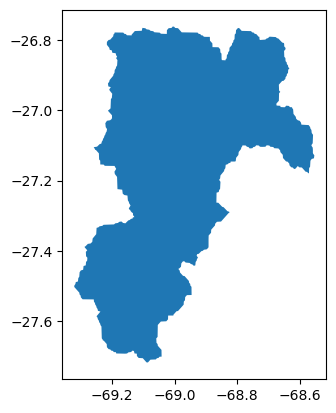

In [52]:
basin.geometry.plot()

In [20]:
import geopandas as gpd
hydroBASIN = gpd.read_file("hydroBASIN/hybas_sa_lev05_v1c\hybas_sa_lev05_v1c.shp")

columbia = box(-75, 8, -73, 10)
basins =  hydroBASIN[hydroBASIN.geometry.intersects(columbia)]
basins

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\puzh\AppData\Local\Temp\ipykernel_32684\3617066111.py:2: SyntaxWarning: invalid escape sequence '\h'
  hydroBASIN = gpd.read_file("hydroBASIN/hybas_sa_lev05_v1c\hybas_sa_lev05_v1c.shp")


,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
1,6050000740,0,6050000740,6050000740,0.0,0.0,17944.3,260739.0,61201,0,0,1,2,"POLYGON ((-74.075 9.59167, -74.07254 9.59131, ..."
2,6050068100,6050000740,6050000740,6050000740,276.9,276.9,17105.5,17105.5,61202,0,0,2,3,"POLYGON ((-74.95833 8.1375, -74.95777 8.12279,..."
3,6050068110,6050000740,6050000740,6050000740,277.1,277.1,610.1,225687.7,61203,0,0,1,4,"POLYGON ((-74.64167 9.04583, -74.63953 9.04519..."
4,6050070260,6050068110,6050000740,6050000740,315.1,315.1,61901.9,61901.9,61204,0,0,2,5,"MULTIPOLYGON (((-74.75417 7.02083, -74.75295 7..."
5,6050070270,6050068110,6050000740,6050000740,315.3,315.3,1690.4,163175.3,61205,0,0,1,6,"POLYGON ((-73.94583 8.9375, -73.94548 8.91424,..."
6,6050069460,6050070270,6050000740,6050000740,398.8,398.8,25043.0,139272.1,61207,0,0,1,7,"POLYGON ((-72.97917 7.62083, -72.97917 7.61667..."
7,6050069430,6050070270,6050000740,6050000740,399.0,399.0,22211.6,22211.6,61206,0,0,2,8,"POLYGON ((-73.00417 9.75, -73.00482 9.74264, -..."
10,6050000750,0,6050000750,6050000750,0.0,0.0,53087.0,53087.0,61301,0,1,0,11,"MULTIPOLYGON (((-74.28056 11.10833, -74.2838 1..."
11,6050001940,0,6050001940,6050001940,0.0,0.0,27553.5,27553.5,61302,0,0,1,12,"POLYGON ((-71.9125 8.1875, -71.91004 8.18714, ..."


In [25]:
basin = hydroBASIN[hydroBASIN.HYBAS_ID==6050000010]

<Axes: >

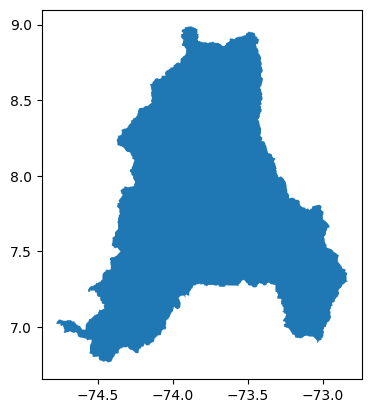

In [38]:
basin.geometry.plot()

In [ ]:
"""Prepare a Copernicus GLO-30 DEM virtual raster (VRT) covering a given geometry"""
from pathlib import Path
from typing import Union

from osgeo import gdal, ogr
from shapely.geometry.base import BaseGeometry

from asf_tools import vector
from asf_tools.util import GDALConfigManager

DEM_GEOJSON = '/vsicurl/https://asf-dem-west.s3.amazonaws.com/v2/cop30-2021.geojson'

gdal.UseExceptions()
ogr.UseExceptions()


def prepare_fabdem_vrt(vrt: Union[str, Path], geometry: Union[ogr.Geometry, BaseGeometry]):
    """Create a DEM mosaic VRT covering a given geometry

    The DEM mosaic is assembled from the Copernicus GLO-30 DEM tiles that intersect the geometry.

    Note: `asf_tools` does not currently support geometries that cross the antimeridian.

    Args:
        vrt: Path for the output VRT file
        geometry: Geometry in EPSG:4326 (lon/lat) projection for which to prepare a DEM mosaic

    """
    with GDALConfigManager(GDAL_DISABLE_READDIR_ON_OPEN='EMPTY_DIR'):
        if isinstance(geometry, BaseGeometry):
            geometry = ogr.CreateGeometryFromWkb(geometry.wkb)

        min_lon, max_lon, _, _ = geometry.GetEnvelope()
        if min_lon < -160. and max_lon > 160.:
            raise ValueError(f'asf_tools does not currently support geometries that cross the antimeridian: {geometry}')

        tile_features = vector.get_features(DEM_GEOJSON)
        if not vector.get_property_values_for_intersecting_features(geometry, tile_features):
            raise ValueError(f'Copernicus GLO-30 DEM does not intersect this geometry: {geometry}')

        dem_file_paths = vector.intersecting_feature_properties(geometry, tile_features, 'file_path')

        gdal.BuildVRT(str(vrt), dem_file_paths)


In [ ]:
buffered_dem_vrt = Path(dem_tile).name.replace('.tif', '_buffered.vrt')
prepare_dem_vrt(buffered_dem_vrt, aoi_buffered)

hand_raster_buffered = tmp_dir / f'HAND_ACC{accumulation_threshold}_buffered.tif'

from calculate import calculate_hand_for_basins
calculate_hand_for_basins(hand_raster_buffered, aoi_buffered, buffered_dem_vrt, acc_thresh=accumulation_threshold)

# Crop out buffered HAND to the original DEM tile size
with rasterio.open(hand_raster_buffered) as sds:
    window = rasterio.windows.from_bounds(*dem_bounds, sds.transform)
    out_pixels = sds.read(
        1, window=window, out_shape=(dem_meta['height'], dem_meta['width']),
        resampling=rasterio.enums.Resampling.bilinear
    )


# # Mask the ocean pixels as identified in the WBM auxiliary DEM files
# wmb_tile = dem_tile.replace('DEM/Copernicus', 'DEM/AUXFILES/Copernicus')
# wmb_tile = wmb_tile.replace('_DEM.tif', f'_WBM.tif')

# with rasterio.open(wmb_tile) as wbm:
#     wbm_pixels = wbm.read(1)

# out_pixels = np.ma.masked_where(wbm_pixels == 1, out_pixels)


# Write out the final HAND tile
from calculate import write_cog

hand_raster = out_dir/ f'{filename}_HAND_ACC{accumulation_threshold}.tif'
write_cog(hand_raster, out_pixels, transform=dem.transform.to_gdal(), epsg_code=dem.crs.to_epsg())